In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import date

In [2]:
df = pd.read_csv('Ruter_data.csv', delimiter = ';')

In [3]:
df.head(20)

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,10:53:53,10:53:59,10:53:00,10:53:00,112,5
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,13:12:20,13:12:26,13:12:00,13:12:00,112,5
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,10:18:56,10:19:21,10:19:00,10:19:00,112,6
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,13:52:04,13:52:26,13:51:00,13:51:00,112,10
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,07:34:13,07:34:53,07:33:00,07:33:00,112,10
5,3110-2020-08-01T16:16:00+02:00,01/08/2020,Oslo,Nordøst,Bjerke,Veitvet (mot Kalbakken),Rødtvet (mot Kalbakken),Lokal,Oslo,31,0,17:22:56,17:23:23,17:16:00,17:16:00,151,8
6,15010-2020-07-28T13:09:00+02:00,28/07/2020,Viken,Vest,Bærum,Nedre Toppenhaug,Øvre Toppenhaug,Lokal,Viken,150,0,13:19:00,13:19:05,13:17:00,13:17:00,112,1
7,15003-2020-07-27T06:18:00+02:00,27/07/2020,Oslo,Indre By,St.Hanshaugen,Hammersborggata (ved Storgata retning vest),St. Olavs plass (mot Frederiks gate),Lokal,Viken,150,1,06:20:24,06:20:29,06:20:00,06:20:00,112,-1
8,21002-2020-08-16T14:33:00+02:00,16/08/2020,Viken,Vest,Bærum,Stein gård,Knabberudveien,Lokal,Viken,150,1,15:10:12,15:10:34,15:09:00,15:09:00,112,2
9,15002-2020-08-13T18:09:00+02:00,13/08/2020,Viken,Vest,Bærum,Bekkestua bussterminal (Plattform C),Stabekk skole,Lokal,Viken,150,0,18:37:41,18:38:19,18:29:00,18:29:00,112,4


In [4]:
#Transform string to date
df['Dato'] = pd.to_datetime(df.Dato, format="%d/%m/%Y")

#Extracting Year
df['År'] = df['Dato'].dt.year

#Extracting Month
df['Måned'] = df['Dato'].dt.month

#Extracting Day
df['Dag'] = df['Dato'].dt.day

## Using one-hot encoding on 'Fylke' column

In [5]:
Oslo = pd.get_dummies(df['Fylke'],drop_first=True)
Oslo.head(20)

,Viken
0,1
1,1
2,1
3,1
4,1
5,0
6,1
7,0
8,1
9,1


## Concat

In [6]:
df = pd.concat([df,Oslo],axis = 1)

In [7]:
df.describe()

,Linjeretning,Kjøretøy_Kapasitet,Passasjerer_Ombord,År,Måned,Dag,Viken
count,6000.000000,6000.000000,6000.000000,6000.0,6000.000000,6000.000000,6000.000000
mean,0.492000,104.712167,4.512833,2020.0,7.112833,16.288833,0.743667
std,0.499978,24.225196,6.735730,0.0,0.811713,8.724358,0.436644
min,0.000000,33.000000,-39.000000,2020.0,6.000000,1.000000,0.000000
25%,0.000000,80.000000,0.000000,2020.0,6.000000,9.000000,0.000000
50%,0.000000,106.000000,3.000000,2020.0,7.000000,17.000000,1.000000
75%,1.000000,112.000000,7.000000,2020.0,8.000000,24.000000,1.000000
max,1.000000,151.000000,64.000000,2020.0,8.000000,31.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   TurId                                      6000 non-null   object        
 1   Dato                                       6000 non-null   datetime64[ns]
 2   Fylke                                      6000 non-null   object        
 3   Område                                     6000 non-null   object        
 4   Kommune                                    6000 non-null   object        
 5   Holdeplass_Fra                             6000 non-null   object        
 6   Holdeplass_Til                             6000 non-null   object        
 7   Linjetype                                  6000 non-null   object        
 8   Linjefylke                                 6000 non-null   object        
 9   Linjenavn          

## Splitting Tur ID from TurId column

In [9]:
df.TurId.str.split(expand=True,)

,0
0,15006-2020-08-10T10:24:00+02:00
1,15002-2020-08-15T12:54:00+02:00
2,15004-2020-08-03T09:54:00+02:00
3,15003-2020-07-27T13:00:00+02:00
4,15002-2020-08-27T07:15:00+02:00
...,...
5995,10001-2020-06-10T15:10:00+02:00
5996,10010-2020-06-23T05:54:00+02:00
5997,2007-2020-06-11T17:22:00+02:00
5998,10004-2020-08-13T04:59:00+02:00


In [10]:
df[['Tur ID','År','Måned','Klokkeslett']] = df.TurId.str.split("-",expand=True,)

In [11]:
df.head(10)

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,...,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord,År,Måned,Dag,Viken,Tur ID,Klokkeslett
0,15006-2020-08-10T10:24:00+02:00,2020-08-10,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,...,10:53:00,10:53:00,112,5,2020,08,10,1,15006,10T10:24:00+02:00
1,15002-2020-08-15T12:54:00+02:00,2020-08-15,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,...,13:12:00,13:12:00,112,5,2020,08,15,1,15002,15T12:54:00+02:00
2,15004-2020-08-03T09:54:00+02:00,2020-08-03,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,...,10:19:00,10:19:00,112,6,2020,08,3,1,15004,03T09:54:00+02:00
3,15003-2020-07-27T13:00:00+02:00,2020-07-27,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,...,13:51:00,13:51:00,112,10,2020,07,27,1,15003,27T13:00:00+02:00
4,15002-2020-08-27T07:15:00+02:00,2020-08-27,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,...,07:33:00,07:33:00,112,10,2020,08,27,1,15002,27T07:15:00+02:00
5,3110-2020-08-01T16:16:00+02:00,2020-08-01,Oslo,Nordøst,Bjerke,Veitvet (mot Kalbakken),Rødtvet (mot Kalbakken),Lokal,Oslo,31,...,17:16:00,17:16:00,151,8,2020,08,1,0,3110,01T16:16:00+02:00
6,15010-2020-07-28T13:09:00+02:00,2020-07-28,Viken,Vest,Bærum,Nedre Toppenhaug,Øvre Toppenhaug,Lokal,Viken,150,...,13:17:00,13:17:00,112,1,2020,07,28,1,15010,28T13:09:00+02:00
7,15003-2020-07-27T06:18:00+02:00,2020-07-27,Oslo,Indre By,St.Hanshaugen,Hammersborggata (ved Storgata retning vest),St. Olavs plass (mot Frederiks gate),Lokal,Viken,150,...,06:20:00,06:20:00,112,-1,2020,07,27,0,15003,27T06:18:00+02:00
8,21002-2020-08-16T14:33:00+02:00,2020-08-16,Viken,Vest,Bærum,Stein gård,Knabberudveien,Lokal,Viken,150,...,15:09:00,15:09:00,112,2,2020,08,16,1,21002,16T14:33:00+02:00
9,15002-2020-08-13T18:09:00+02:00,2020-08-13,Viken,Vest,Bærum,Bekkestua bussterminal (Plattform C),Stabekk skole,Lokal,Viken,150,...,18:29:00,18:29:00,112,4,2020,08,13,1,15002,13T18:09:00+02:00


## Splitting time

In [12]:
df[['Time','Minutt','Sekund']] = df.Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra.str.split(":",expand=True,)

In [13]:
df.head()

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,...,Passasjerer_Ombord,År,Måned,Dag,Viken,Tur ID,Klokkeslett,Time,Minutt,Sekund
0,15006-2020-08-10T10:24:00+02:00,2020-08-10,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,...,5,2020,08,10,1,15006,10T10:24:00+02:00,10,53,53
1,15002-2020-08-15T12:54:00+02:00,2020-08-15,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,...,5,2020,08,15,1,15002,15T12:54:00+02:00,13,12,20
2,15004-2020-08-03T09:54:00+02:00,2020-08-03,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,...,6,2020,08,3,1,15004,03T09:54:00+02:00,10,18,56
3,15003-2020-07-27T13:00:00+02:00,2020-07-27,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,...,10,2020,07,27,1,15003,27T13:00:00+02:00,13,52,04
4,15002-2020-08-27T07:15:00+02:00,2020-08-27,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,...,10,2020,08,27,1,15002,27T07:15:00+02:00,07,34,13


## Plotting bar chart

<AxesSubplot:>

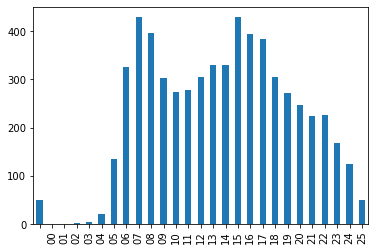

In [14]:
df['Time'].value_counts().sort_index().plot.bar()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 26 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   TurId                                      6000 non-null   object        
 1   Dato                                       6000 non-null   datetime64[ns]
 2   Fylke                                      6000 non-null   object        
 3   Område                                     6000 non-null   object        
 4   Kommune                                    6000 non-null   object        
 5   Holdeplass_Fra                             6000 non-null   object        
 6   Holdeplass_Til                             6000 non-null   object        
 7   Linjetype                                  6000 non-null   object        
 8   Linjefylke                                 6000 non-null   object        
 9   Linjenavn          

## Convert 'Time' to float

In [17]:
df['Time'] = pd.to_numeric(df['Time'],errors='coerce')

## Histogram
Function Used:
sns.distplot()

Gaussian Kernel density estimate set to false

Here you can clearly see there is few routes at night and many in rush hours

<AxesSubplot:xlabel='Time'>

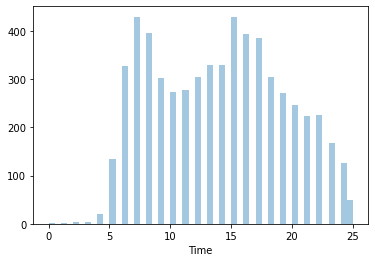

In [18]:
sns.distplot(df['Time'], bins=50, kde=False)

### Histogram with KDE set to True

<AxesSubplot:xlabel='Time', ylabel='Density'>

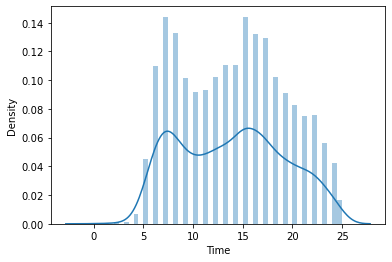

In [19]:
sns.distplot(df['Time'], bins=50, kde=True)

## Bar chart with seaborn

/opt/miniconda3/envs/dave3625/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Time', ylabel='count'>

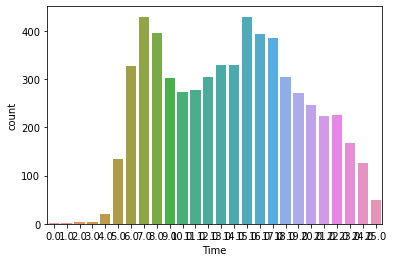

In [21]:
sns.countplot(df['Time'])

### Bar chart with pandas

Function Used:
groupby(), mean(), sort_values()

First, we group by 'Linjetype' and take the mean value of 'Kjøretøy_Kapasitet' in decending order.
Here we can se night buses have high capacity and school buses low.

<AxesSubplot:xlabel='Linjetype'>

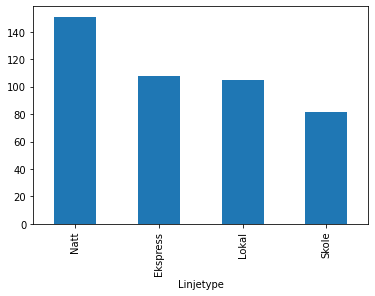

In [22]:
df.groupby("Linjetype").Kjøretøy_Kapasitet.mean().sort_values(ascending=False)[:5].plot.bar()

Second, we group by 'Linjetype' again and take the mean value of 'Time' in decending order.
Here we can se night buses drive around 4.

<AxesSubplot:xlabel='Linjetype'>

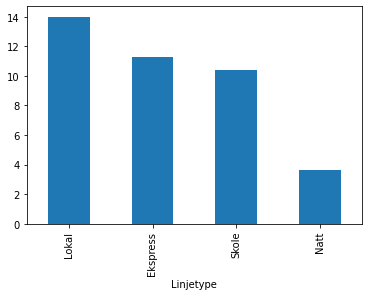

In [23]:
df.groupby("Linjetype").Time.mean().sort_values(ascending=False)[:5].plot.bar()